# **Zomato Analytics - Exploratory Data Analysis**

## **Objective**
Conduct a comprehensive **Exploratory Data Analysis (EDA)** to gain insights into **restaurant operations, customer preferences, and dining trends**.  
Identify actionable patterns in **restaurant ratings, customer votes, pricing, and other key factors** to support strategic business decisions.


# Dataset Overview

The dataset provides detailed information about restaurants listed on **Zomato**, including:

### **1. Restaurant Details**
- **Names**, **cuisines served**, **locations**, and **operating areas** of restaurants.

### **2. Customer Feedback**
- **Ratings**, **votes**, and **reviews** reflecting customer preferences and satisfaction.

### **3. Pricing Information**
- **Average cost for two people** and related **pricing details** to understand affordability trends.

### **4. Geographical Insights**
- Data segregated by **regions, cities, and countries**, helping analyze location-based patterns.

### **5. Categorical Details**
- **Type of restaurant** (dine-in, delivery, quick bites, etc.).
- **Featured cuisines** and **meal types** available.

This dataset will be analyzed to uncover trends in **pricing, popularity, and customer behavior** across various cuisines and regions, providing insights into the restaurant industry.


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [37]:

df= pd.read_csv('Indian-Resturants.csv')

## Display the first few rows of the dataset

In [39]:

df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


## information about the dataset

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

## Shape and size of the dataset :

In [43]:
df.shape

(211944, 26)

In [44]:
df.size

5510544

## Summarizing the Data 

In [48]:
df.describe

<bound method NDFrame.describe of           res_id                            name      establishment  \
0        3400299                     Bikanervala    ['Quick Bites']   
1        3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2        3401013                   Bhagat Halwai    ['Quick Bites']   
3        3400290                   Bhagat Halwai    ['Quick Bites']   
4        3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   
...          ...                             ...                ...   
211939   3202251  Kali Mirch Cafe And Restaurant  ['Casual Dining']   
211940   3200996                      Raju Omlet    ['Quick Bites']   
211941  18984164                The Grand Thakar  ['Casual Dining']   
211942   3201138                          Subway    ['Quick Bites']   
211943  18879846     Freshco's - The Health Cafe           ['Café']   

                                                      url  \
0       https://www.zomato.com/agra/bikanervala-khan

## Checking for Unique values 

In [54]:
df['city'].nunique()

99

In [56]:
df['city'].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [207]:
df["price_range"].unique()

array([2, 1, 3, 4], dtype=int64)

In [213]:
df["opentable_support"].unique()

array([ 0., nan])

In [215]:
df["delivery"].unique()

array([-1,  1,  0], dtype=int64)

In [217]:
df["takeaway"].unique()

array([-1], dtype=int64)

In [219]:
df["currency"].unique()

array(['Rs.'], dtype=object)

In [209]:
df[["aggregate_rating","votes","photo_count"]].describe().loc[["mean","min","max"]]

,aggregate_rating,votes,photo_count
mean,2.958593,223.330352,160.97477
min,0.000000,-18.000000,0.00000
max,4.900000,42539.000000,17702.00000


# Data Cleaning

In [59]:
df['res_id'].duplicated() #to confirm the duplication

0         False
1         False
2         False
3         False
4         False
          ...  
211939     True
211940    False
211941     True
211942    False
211943     True
Name: res_id, Length: 211944, dtype: bool

### There are duplicates in 'res_id', so we need to remove them.

## Removing Duplicates 

In [62]:
df.drop_duplicates(["res_id"],keep="first",inplace=True)
df.shape

(55568, 26)

### "It’s great that we removed the duplicates before starting the analysis, as they made up almost 75% of our dataset. Although we are left with only a quarter of the original data, having over 55,000 restaurants is still sufficient for meaningful analysis."

## Checking if duplicates are removed or Not :

In [66]:
df.duplicated().sum()

0

## Finding Missing Values

In [69]:
df.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

# Omitting Unnecessary Features  

Here, we will examine each feature and determine whether to include it in our analysis:  

- **res_id** – A unique identifier for each restaurants.  
- **name** – Useful for identifying top restaurants.  
- **establishment** – Let's explore the different types of values in this feature.  



## Cleaning 'establishment' Column

In [73]:
df["establishment"].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [75]:
print(df["establishment"].unique()[0])
print(type(df["establishment"].unique()[0]))

['Quick Bites']
<class 'str'>


### Establishment looks like a nice feature to perform EDA, however each value has an unwanted square brackets and quotes which seems noisy. Let's remove them with apply( ) function. Also, we have one value which is an empty string, let's rename it to "NA" to avoid confusion.

In [78]:
# Removing [' '] from each value
print(df["establishment"].unique()[0])
df["establishment"] = df["establishment"].apply(lambda x:x[2:-2])
print(df["establishment"].unique()[0])

# Changing ''  to 'NA'
print(df["establishment"].unique())
df["establishment"] = df["establishment"].apply(lambda x : np.where(x=="", "NA", x))
print(df["establishment"].unique())

['Quick Bites']
Quick Bites
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' 'NA' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


- **url** – The link to the restaurant's page, which is not useful for our analysis.  
- **address** – Not useful as it contains long strings, making classification difficult.  
 


In [81]:
df1 = df.drop(columns=['url', 'address', 'zipcode','timings'])

In [83]:
df1["cuisines"].unique()

array(['North Indian, South Indian, Mithai, Street Food, Desserts',
       'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food',
       'Fast Food, Mithai', ...,
       'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai',
       'North Indian, Chinese, Mexican, Italian, Thai, Continental',
       'North Indian, Lucknowi, Chinese'], dtype=object)

In [85]:
df1 = df1.dropna(subset=['cuisines'])


## Filling Null Values in 'opentable_support' Column with Mode

In [88]:
mode_value = df1['opentable_support'].mode()[0]  
df1['opentable_support'] = df1['opentable_support'].fillna(mode_value)


# EDA Statistical Analysis


### Descriptive Statistics: Summarize the central tendency, dispersion, and shape of the dataset's distribution.
### Distribution Analysis: Analyze the distribution of key variables (e.g., ratings,price range, cuisines).
### Correlation Analysis: Examine the relationships between different variables.

### Average rating :

In [93]:
print(f"Average Rating: {df1['aggregate_rating'].mean()}")

Average Rating: 2.97947838397038


In [95]:
df1.describe() #this is the way to get statistical analysis of all the values

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,5.509800e+04,55098.000000,55098.000000,55098.000000,55098.0,55098.000000,55098.000000,55098.000000,55098.000000,55098.000000,55098.0,55098.000000,55098.0
mean,1.309156e+07,3354.276997,21.432702,76.511880,1.0,531.792697,1.719591,2.979478,225.210008,162.336782,0.0,-0.345003,-1.0
std,8.122561e+06,5150.396004,43.079375,10.937547,0.0,595.916590,0.879407,1.449025,620.517701,589.287353,0.0,0.935579,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.000944e+06,8.000000,16.511407,74.747339,1.0,200.000000,1.000000,2.900000,6.000000,1.000000,0.0,-1.000000,-1.0
50%,1.869208e+07,26.000000,22.465234,77.104666,1.0,350.000000,1.000000,3.500000,36.000000,10.000000,0.0,-1.000000,-1.0
75%,1.887349e+07,11294.000000,26.752206,79.831778,1.0,600.000000,2.000000,3.900000,177.000000,70.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [97]:
df1[['price_range', 'aggregate_rating']].describe()


,price_range,aggregate_rating
count,55098.000000,55098.000000
mean,1.719591,2.979478
std,0.879407,1.449025
min,1.000000,0.000000
25%,1.000000,2.900000
50%,1.000000,3.500000
75%,2.000000,3.900000
max,4.000000,4.900000


In [99]:
df1.describe(include=['object']) #getting description for all the categorical or descriptive columns

,name,establishment,city,locality,locality_verbose,cuisines,currency,highlights,rating_text
count,55098,55098,55098,55098,55098,55098,55098,55098,55098
unique,40757,27,99,3727,3905,9382,1,31167,33
top,Domino's Pizza,Quick Bites,Bangalore,Civil Lines,"Gomti Nagar, Lucknow",North Indian,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",Average
freq,399,14000,2247,751,274,4295,55098,860,16256


##  Observations  

This analysis provides further insights based on current observations:  

- **Most Frequent Establishment Type:** The most common type of restaurant on Zomato, according to the data, is **'Quick Bytes'**. There are a total of **27 different types of establishments**.  
- **City with Most Restaurants:** Based on the dataset, **Banglore** appears to have the highest number of restaurants. However, this could be influenced by the data collection process, and further discussion with stakeholders is needed for validation. The dataset includes **99 more cities** for further analysis.  
- **Most Existing Cuisine:** **North Indian** cuisine is the most frequently occurring cuisine in the dataset.   


### Finding Outliers:

In [74]:
# calculate the IQR
Q1=df1['aggregate_rating'].quantile(0.25)
Q3=df1['aggregate_rating'].quantile(0.75)
IQR=Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Identify outliers
outliers = df1[(df1['aggregate_rating'] < lower_bound) | (df1['aggregate_rating'] > upper_bound)]
 
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"lower: {lower_bound}")
print(f"upper: {upper_bound}")

Q1: 2.9
Q3: 3.9
IQR: 1.0
lower: 1.4
upper: 5.4


# Checking Distribution of ratings 

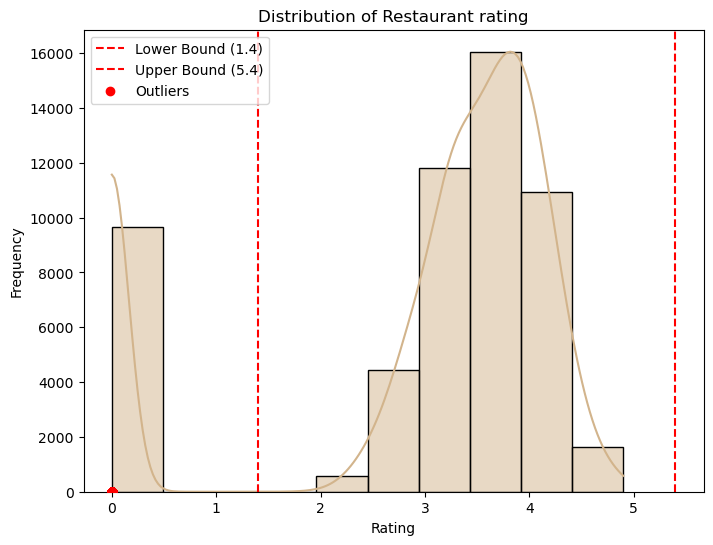

In [77]:
# Create a histogram to visualize the distribution of the data
plt.figure(figsize=(8, 6))
sns.histplot(df1['aggregate_rating'], bins=10, kde=True, color='#D2B48C', edgecolor='black')

plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound})')
plt.axvline(x=upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound})')


outlier_values = df1[(df1['aggregate_rating'] < lower_bound) | (df1['aggregate_rating'] > upper_bound)]['aggregate_rating']
plt.scatter(outlier_values, np.zeros_like(outlier_values), color='red', label='Outliers', zorder=5)

plt.title('Distribution of Restaurant rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()

plt.show()

## Observations:
- The distribution of restaurant ratings is **right-skewed**, with a majority of ratings falling between **3 and 4**.  
- There are also some **outliers below the lower bound**, indicating very low ratings.

## Recommendations:
###  **Focus on High-Rated Restaurants**  
- Prioritize **marketing and promotions** for restaurants with **high ratings (4 and above)** to attract more customers.  

###  **Address Low-Rated Restaurants**  
- Identify the reasons for **low ratings** and take corrective actions, such as improving:  
  - **Service quality**  
  - **Food quality**  
  - **Ambiance**  

###  **Customer Feedback Analysis**  
- Regularly **analyze customer feedback and reviews** to identify areas for improvement.  
- Implement necessary changes based on customer insights.


# Boxplot of rating

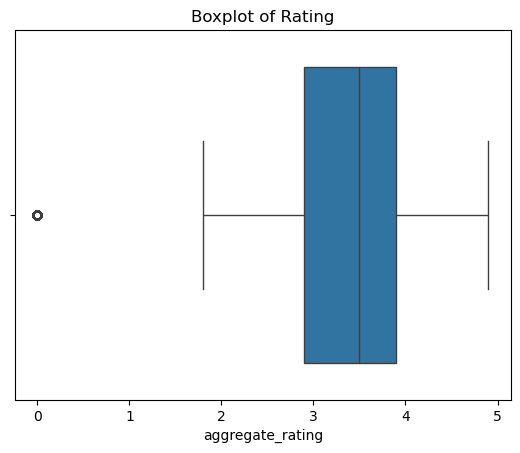

In [80]:
sns.boxplot(x='aggregate_rating', data=df1)
plt.title('Boxplot of Rating')
plt.show()

# Calculate quartiles
Q1 = df1['aggregate_rating'].quantile(0.25)
Q3 = df1['aggregate_rating'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5 * IQR

outliers = df1[(df1['aggregate_rating'] < Q1 - threshold) | (df1['aggregate_rating'] > Q3 + threshold)]

#  Observations from the Boxplot of Aggregate Ratings

### **1️ Right-Skewed Distribution**
- The **median** is closer to the **upper quartile (Q3)**, indicating a **right-skewed distribution**.
- Most ratings are clustered between **3 and 4.5**, with fewer lower ratings.

### **2️ Presence of an Outlier**
- There is a **single outlier** at **0** (far left).
- This suggests at least one restaurant has an **unusually low rating**, which might need investigation.

### **3️ Interquartile Range (IQR)**
- The **middle 50% of ratings** (from **Q1 to Q3**) are between **2.5 and 4.5**.
- The **whiskers** extend from approximately **1.5 to 5**, showing the overall range of most ratings.



## Handle the outliers at the threshold values



In [85]:
df1['aggregate_rating'] = df1['aggregate_rating'].clip(lower=Q1 - threshold, upper=Q3 + threshold)

##  Boxplot of aggregate_rating after Outlier Treatment

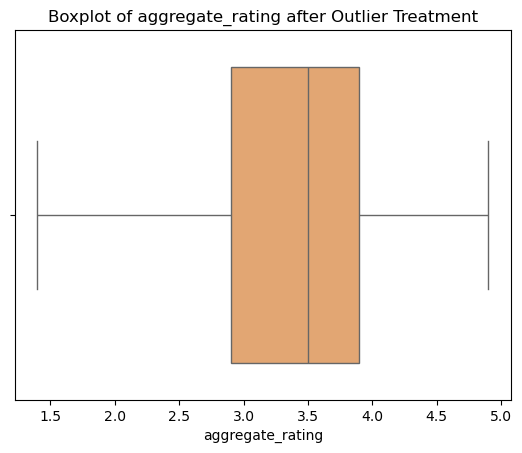

In [88]:
sns.boxplot(x='aggregate_rating', data=df1,color='#F4A460')
plt.title('Boxplot of aggregate_rating after Outlier Treatment')
plt.show()

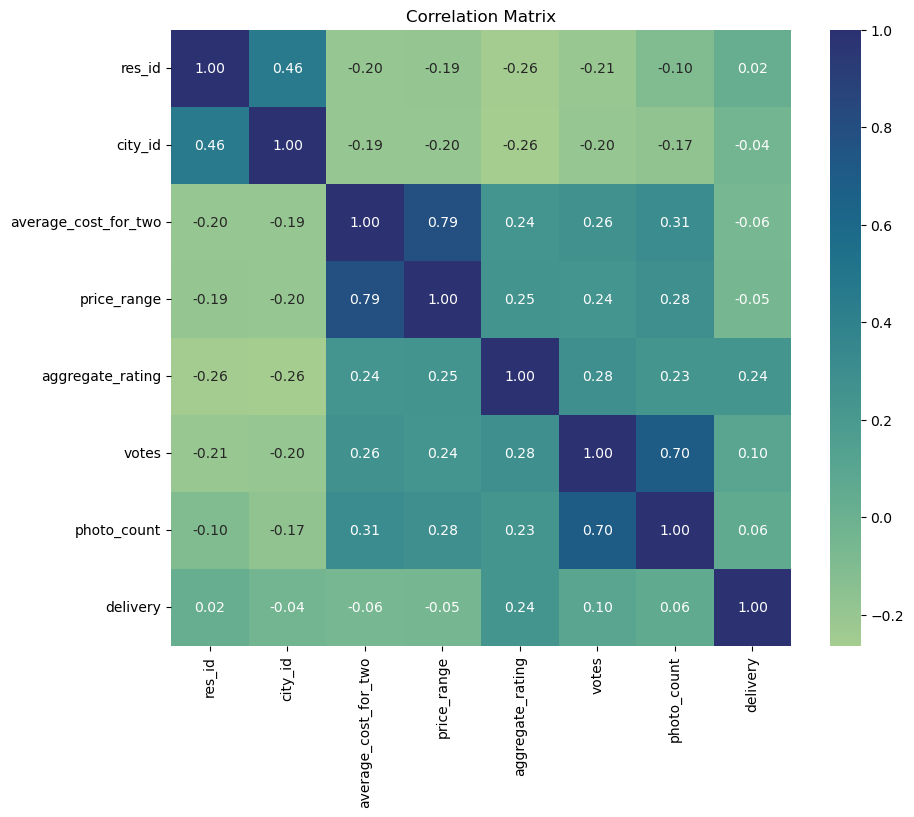

In [171]:
correlation = df2.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="crest", fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### It is evident that for there is positive correlation between photo count and votes. It can be infered that all popular restuarants have their photos available. Moreover, price range is also related to costs for two. The higher the costs for two is resturants will fall in the place of high range for price

# Data Visualization

## 1.Location Analysis

### 1.1 Cities with the highest concentration of restaurants 

In [93]:
df1['city'].value_counts()

city
Bangalore        2247
Mumbai           2022
Pune             1843
Chennai          1827
New Delhi        1704
                 ... 
Udupi              60
Howrah             50
Neemrana           26
Greater Noida      21
Nayagaon           15
Name: count, Length: 99, dtype: int64

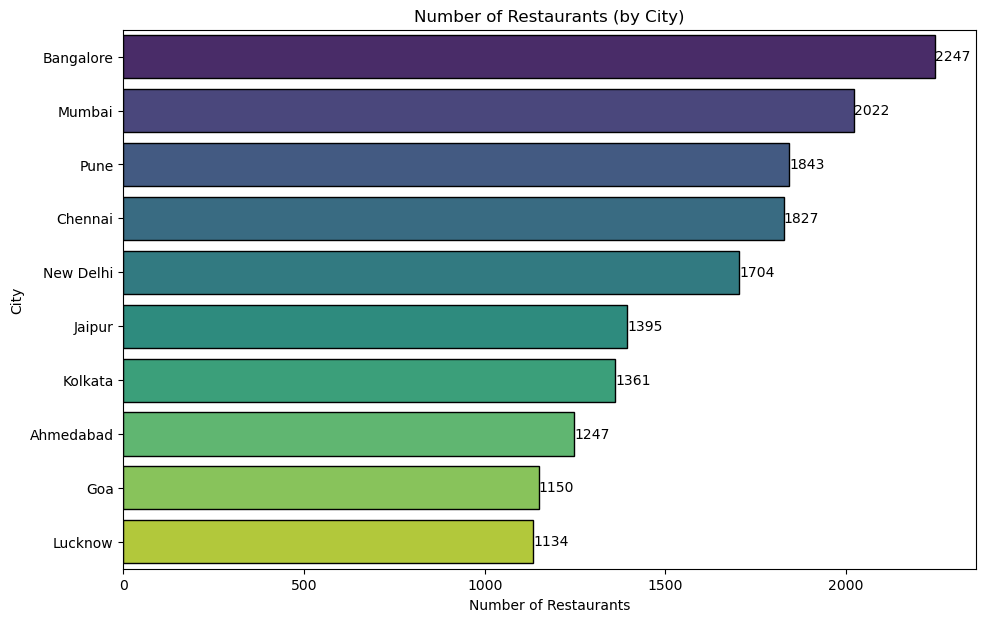

In [187]:

# Calculate the value counts for the top 10 cities
city_counts = df1.groupby("city").count()["res_id"].sort_values(ascending=False).head(10)
city_counts_df = city_counts.reset_index()
city_counts_df.columns = ["City", "Number of Restaurants"]

colors = sns.color_palette("viridis", len(city_counts_df))

plt.figure(figsize=(11, 7))
sns.barplot(
    x="Number of Restaurants", 
    y="City", 
    data=city_counts_df, 
    palette=colors,  # Apply viridis colors
    edgecolor="black"
)

for index, value in enumerate(city_counts_df["Number of Restaurants"]):
    plt.text(value, index, str(value), color="black", ha="left", va="center")

plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.title("Number of Restaurants (by City)")

plt.show()


#  Observations: Distribution of Restaurants by City  

##  Bangalore Leads the Pack  
- With **2,247 restaurants**, Bangalore emerges as the top city, showcasing its vibrant food culture and high demand for dining options.  

##  Mumbai’s Competitive Edge  
- Mumbai, with **2,022 restaurants**, secures the second spot, reflecting its diverse culinary scene and a strong market for food businesses.  

##  Pune and Chennai in Close Competition  
- **Pune (1,843)** and **Chennai (1,827)** are nearly tied for third and fourth places, highlighting their growing prominence as food destinations.  

## Capital City's Moderate Presence  
- **New Delhi**, despite being the national capital, ranks fifth with **1,704 restaurants**, indicating room for expansion in its restaurant ecosystem.  

## Emerging Markets  
- Cities like **Jaipur (1,395), Kolkata (1,361), Ahmedabad (1,247), Goa (1,150), and Lucknow (1,135)** show significant but comparatively smaller restaurant markets, reflecting potential growth opportunities.  

---

## Insights on Trends  
 **Metropolitan cities dominate** due to high population density and disposable incomes.  
 **Tier-2 cities** like Ahmedabad, Goa, and Lucknow, while smaller in numbers, are key areas to watch as they continue to develop their dining landscapes.  


# 1.2 Visualize restaurant rating by city

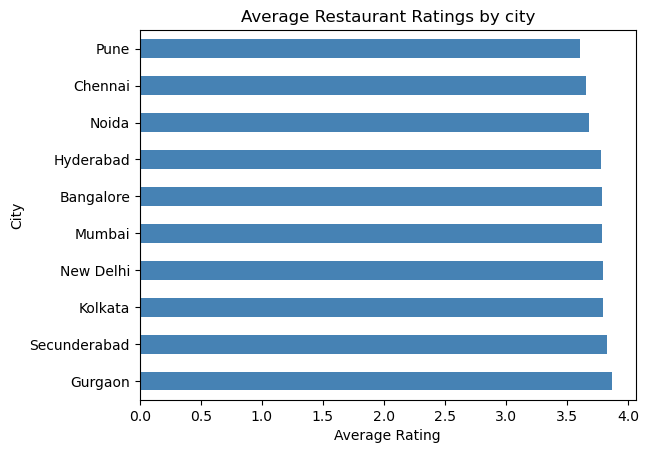

In [99]:
city_counts = df1['city'].value_counts()
city_ratings = df1.groupby('city')['aggregate_rating'].mean()
city_ratings.sort_values(ascending=False).head(10).plot(kind='barh', color='#4682B4')
plt.title('Average Restaurant Ratings by city')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()


### Observations:
- The average restaurant ratings are relatively high across all cities, with Gurgaon having the highest average rating.
- There is not a significant difference in ratings between cities.

### Recommendations:
- **Maintain High Standards**: Zomato should continue to maintain high standards for restaurant partners to ensure consistent quality across all cities.
- **Targeted Marketing**: While all cities have high ratings, targeted marketing campaigns can be implemented to highlight specific cuisines, restaurants, or promotions in each city to drive sales.
- **Customer Feedback Analysis**: Regularly analyze customer feedback and reviews to identify areas for improvement and implement necessary changes in specific cities.


# Comparison Of City Frequency With Mean Rating

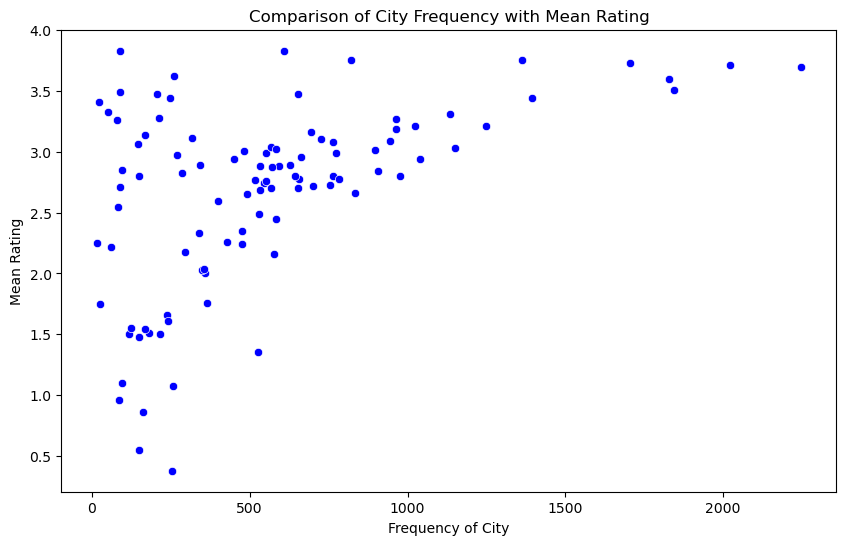

In [103]:
city_stats = df1.groupby('city').agg(mean_rating=('aggregate_rating', 'mean'), frequency=('city', 'size')).reset_index()

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create scatter plot
sns.scatterplot(x='frequency', y='mean_rating', data=city_stats, color='blue')

# Add labels and title
plt.xlabel('Frequency of City')
plt.ylabel('Mean Rating')
plt.title('Comparison of City Frequency with Mean Rating')

# Show the plot
plt.show()

# Total Votes Distribution Across Cities

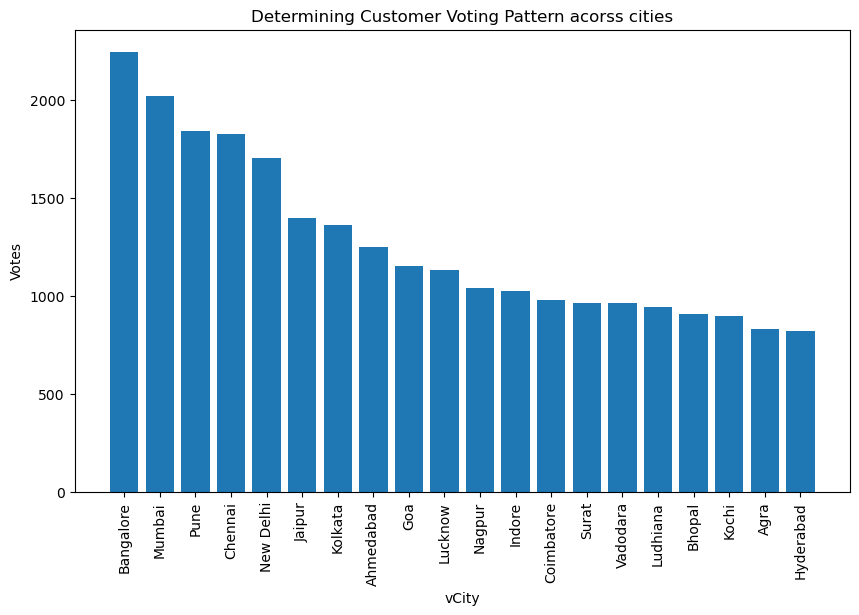

In [201]:

estb = df1.groupby('city')['votes'].size().reset_index()
estb1 = estb.sort_values(by='votes', ascending=False)
top10estb = estb1.head(20)


plt.figure(figsize=(10, 6))
plt.bar(top10estb['city'], top10estb['votes'])
# Add labels and title
plt.xlabel('vCity')
plt.ylabel('Votes')
plt.title('Determining Customer Voting Pattern acorss cities')
plt.xticks(rotation=90)

plt.show()


### Bangalore has overall most number of votes . It is followed by Mumbai and others as depicted in above visual

#  Cuisine Analysis:

## Checking most popular cuisines among the listed restaurants :

In [104]:
cuisine_counts = df['cuisines'].value_counts()
cuisine_counts.head(10)

cuisines
North Indian             4295
Fast Food                2025
North Indian, Chinese    1636
Bakery                   1585
South Indian             1489
Street Food              1187
Cafe                     1098
Mithai                   1020
Desserts                  922
Bakery, Desserts          836
Name: count, dtype: int64

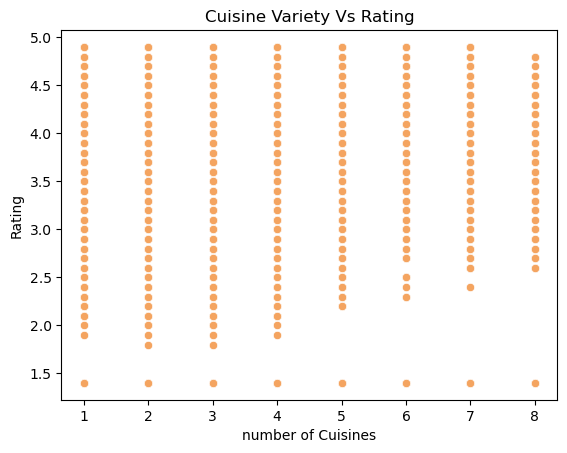

In [106]:
df1['new_cuisines'] = df1['cuisines'].apply(lambda x: len(x.split(',')))
sns.scatterplot(x='new_cuisines',y='aggregate_rating',data=df1,color='#F4A460')
plt.title('Cuisine Variety Vs Rating')
plt.xlabel('number of Cuisines')
plt.ylabel('Rating')
plt.show()

### Observations:
- There doesn't seem to be a strong correlation between the number of cuisines offered by a restaurant and its rating.
- Restaurants with a wide range of cuisines (up to 8) have similar ratings to those with fewer cuisines.

### Recommendations:
- **Focus on Quality Over Quantity**: Rather than focusing on offering a wide variety of cuisines, restaurants should prioritize offering high-quality dishes within a few core cuisines.
- **Customer Feedback Analysis**: Analyze customer feedback to understand the most popular cuisines and dishes, and focus on improving these offerings.
- **Unique Selling Proposition**: Restaurants should aim to differentiate themselves by offering unique dishes or dining experiences, rather than simply focusing on the number of cuisines.
- **Efficient Operations**: Offering a wide variety of cuisines can increase operational complexity and costs. Restaurants should focus on streamlining operations and optimizing their menu to maintain quality and profitability.


## Number of Restaurants by Cuisine :

In [110]:
cuisiness = df1['cuisines']
# Calculate the top 5 cuisines
cuisines_count = cuisiness.value_counts()[:5].reset_index()
cuisines_count.columns = ['cuisine', 'count']
cuisines_count


,cuisine,count
0,North Indian,4295
1,Fast Food,2025
2,"North Indian, Chinese",1636
3,Bakery,1585
4,South Indian,1489


# Top 5 cuisines

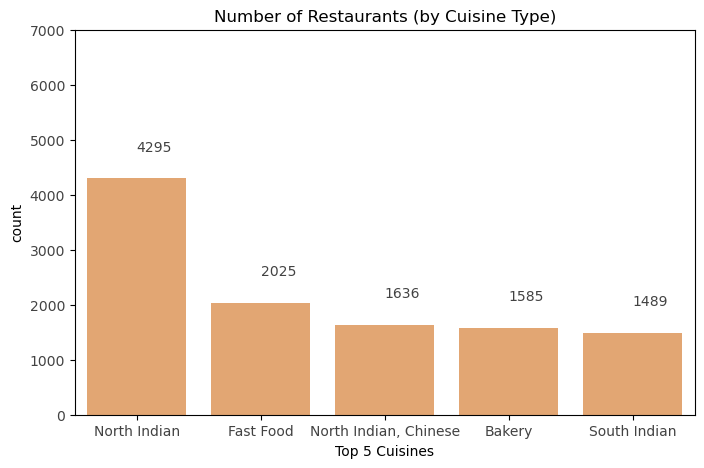

In [113]:
# Plotting with Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='cuisine', y='count', data=cuisines_count,color='#F4A460')
plt.xticks(color="#424242")
plt.yticks(range(0, 8000, 1000), color="#424242")
plt.xlabel("Top 5 Cuisines")
plt.title("Number of Restaurants (by Cuisine Type)")

for index, value in enumerate(cuisines_count['count']):
    plt.text(index, value + 500, str(value), color='#424242')

plt.show()

### North Indian Cuisine Dominates  
- With **4,295 restaurants** offering North Indian cuisine, it significantly surpasses other cuisine types, indicating its **high popularity and demand** across cities.  

### Fast Food on the Rise  
- **Fast Food** takes the second spot with **2,025 outlets**, showcasing the growing influence of **quick and convenient dining options**, especially among younger demographics.  

### Fusion Appeal of North Indian and Chinese  
- The combination of **North Indian and Chinese cuisines**, offered by **1,636 restaurants**, highlights the growing demand for **diverse and fusion dining experiences**.  

### Bakery and South Indian are Close Competitors  
- **Bakery (1,585)** and **South Indian (1,489)** cuisines have a strong presence, indicating their **consistent appeal as comfort food and traditional staples**, respectively.  

### Insights on Trends  
- **Cultural Significance**: The dominance of North Indian cuisine reflects its **widespread acceptance and cultural roots** in the Indian dining space.  
- **Fusion Opportunities**: The demand for mixed cuisines like **North Indian and Chinese** points toward opportunities for **innovative food combinations**.  
- **Changing Preferences**: The growth in **Fast Food restaurants** indicates **shifting consumer preferences** toward **convenience-driven dining**.  


# Price Range and Rating

## Price Range Count

In [118]:
# Calculate the value counts for price ranges
pr_count = df1.groupby("price_range").count()["name"].reset_index()
pr_count.columns = ['price_range', 'count']

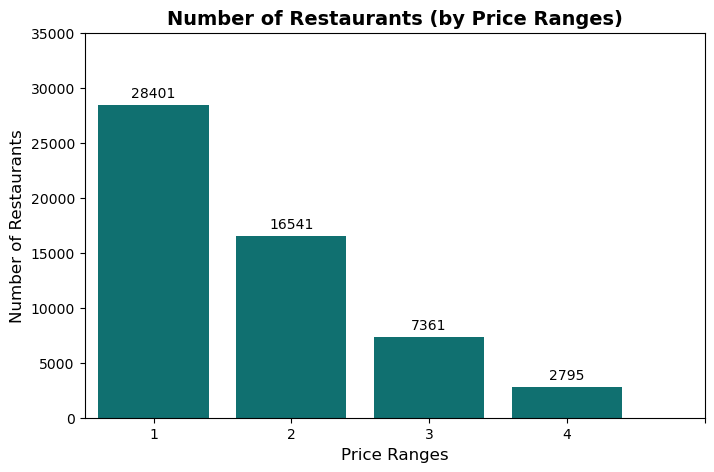

In [120]:

plt.figure(figsize=(8, 5))
sns.barplot(x='price_range', y='count', data=pr_count, color="#008080")  

plt.xticks(range(0, 5), color="black")  # Changed from white to black for visibility
plt.yticks(range(0, 40000, 5000), color="black")  # Changed from white to black
plt.xlabel("Price Ranges", color="black", fontsize=12)  # Updated font size for clarity
plt.ylabel("Number of Restaurants", color="black", fontsize=12)
plt.title("Number of Restaurants (by Price Ranges)", color="black", fontsize=14, fontweight='bold')

for index, value in enumerate(pr_count['count']):
    plt.text(index, value + 700, str(value), color='black', ha='center', fontsize=10)

plt.show()


### Price range chart supports our previous observation from the Average cost chart. Number of restaurant decreases with increase in price range

# Relationship Between Price Range and Ratings

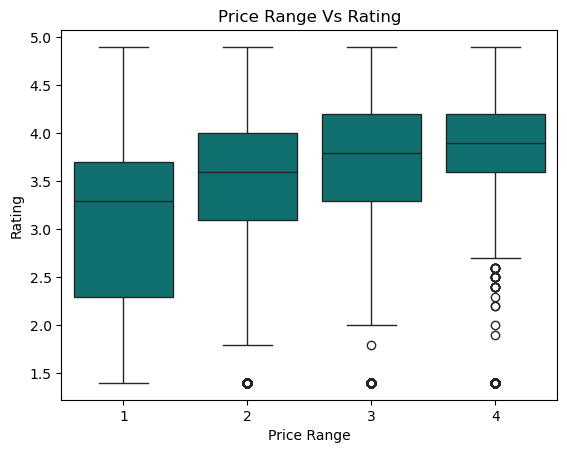

In [124]:
sns.boxplot(data=df1,x='price_range',y='aggregate_rating',color="#008080")
plt.title('Price Range Vs Rating')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.show()

### Now, it is clear. The higher the price a restaurant charges, more services they provide and hence more chances of getting good ratings from their customers.

# Calculating the average cost for two people in different price categories 

In [128]:
price_rating = df1.groupby('price_range')['average_cost_for_two'].mean()
price_rating

price_range
1     219.258125
2     522.320839
3    1091.659965
4    2289.139893
Name: average_cost_for_two, dtype: float64

# Online Order Impact on Ratings

## Categorizing Restaurants by Online Order Availability:

In [117]:
delivery_group = df1.groupby('delivery')['aggregate_rating'].median()
delivery_group


delivery
-1    3.3
 0    3.3
 1    3.7
Name: aggregate_rating, dtype: float64

## Visualize the Impact on Ratings :

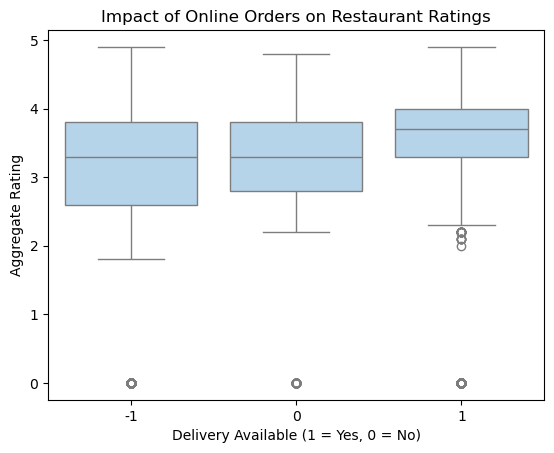

In [119]:
sns.boxplot(x='delivery', y='aggregate_rating', data=df1,color='#AED6F1')
plt.title('Impact of Online Orders on Restaurant Ratings')
plt.xlabel('Delivery Available (1 = Yes, 0 = No)')
plt.ylabel('Aggregate Rating')
plt.show()

## Number of Restaurants Offering Table Booking :

In [125]:
df1['opentable_support'].value_counts()

opentable_support
0.0    55098
Name: count, dtype: int64

# Top Restaurant Chains 

In [128]:
restaurant_counts = df1['name'].value_counts()
top_chains = restaurant_counts.head(10)
top_chains

name
Domino's Pizza     399
Cafe Coffee Day    315
KFC                203
Baskin Robbins     202
Keventers          189
Subway             178
McDonald's         130
Pizza Hut          125
Barbeque Nation    112
Burger King        110
Name: count, dtype: int64

## Top 20 chains Based on Outlets

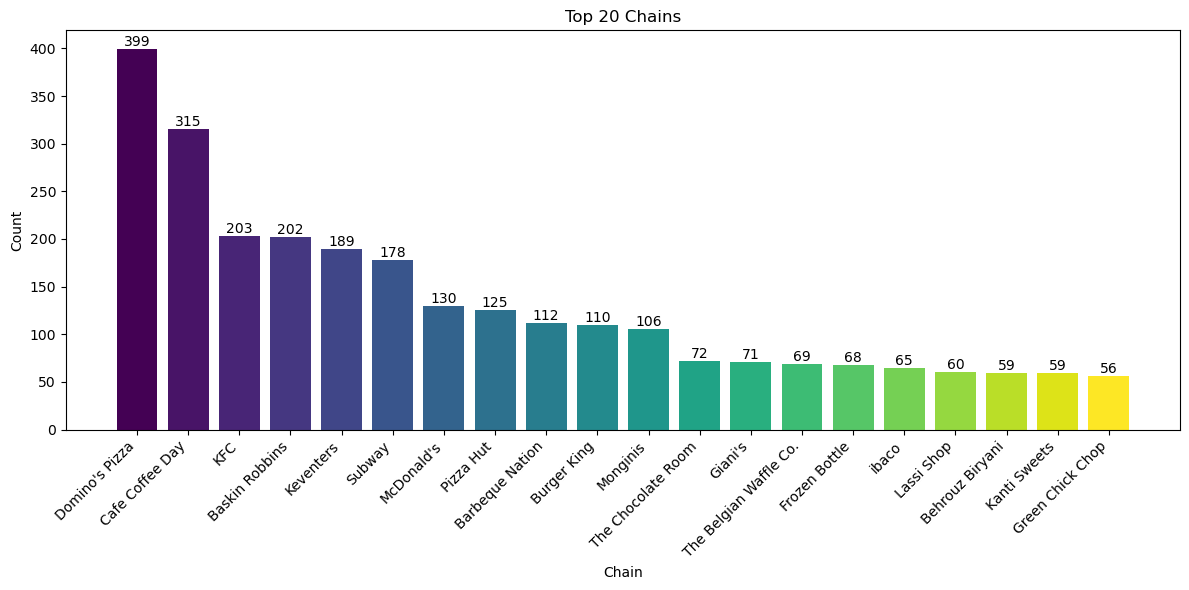

In [190]:

chain_counts1 = df1['name'].value_counts().head(20)

plt.figure(figsize=(12, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(chain_counts1)))

bars = plt.bar(chain_counts1.index, chain_counts1.values, color=colors)

plt.xlabel('Chain')
plt.ylabel('Count')
plt.title('Top 20 Chains')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             str(bar.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()


## Observations & Recommendations  

### Observations  
- **Leading Restaurant Chain:** **Domino’s Pizza** has the highest number of outlets, followed by **Cafe Coffee Day**.  
- **Other Major Chains:** **KFC, Subway, and Keventers** also have a significant presence in the market.  

### Recommendations  
1. **Strategic Partnerships:** Zomato can collaborate with these top restaurant chains to provide **exclusive deals, discounts, and loyalty programs** to attract more customers.  
2. **Data-Driven Insights:** Leveraging **data analytics** can help identify high-performing outlets and optimize **marketing strategies** for better engagement.  
3. **Geographic Expansion:** Encourage these chains to **expand in high-demand areas** with limited competition to maximize market penetration.  


## Top 20 resturants Based on Ratings

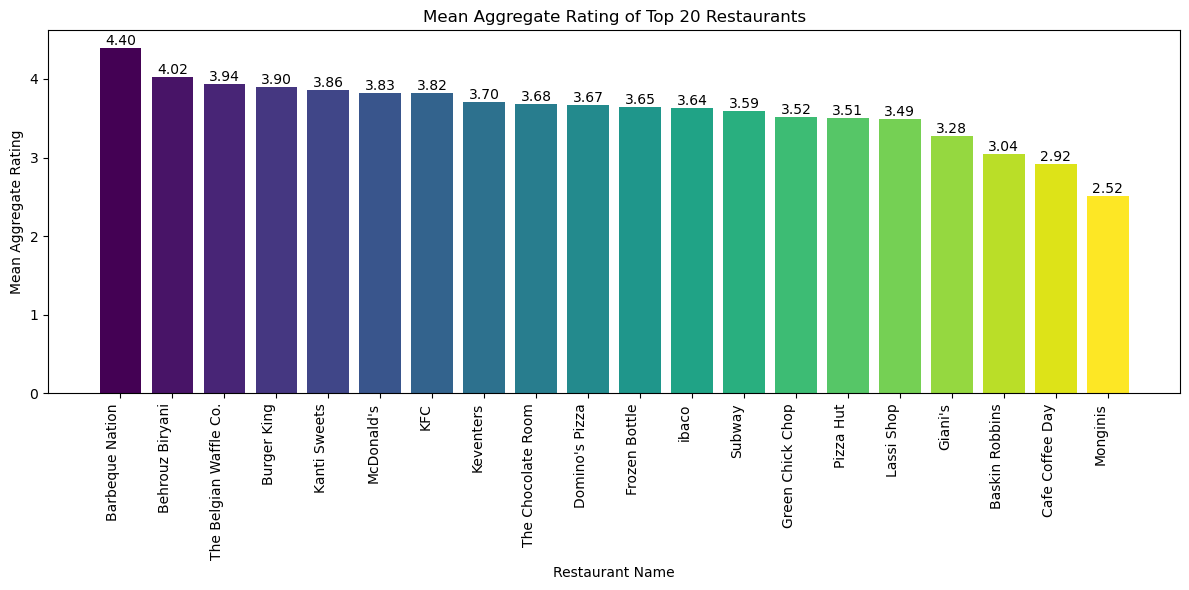

In [194]:

chain_counts1 = df1['name'].value_counts().head(20)

chain_counts = df1.groupby('name')['aggregate_rating'].mean().reset_index()

chain_counts = chain_counts[chain_counts['name'].isin(chain_counts1.index)]
chain_counts = chain_counts.sort_values(by=['aggregate_rating'], ascending=False)

colors = plt.cm.viridis(np.linspace(0, 1, len(chain_counts)))

plt.figure(figsize=(12, 6))
bars = plt.bar(chain_counts['name'], chain_counts['aggregate_rating'], color=colors)

plt.xlabel('Restaurant Name')
plt.ylabel('Mean Aggregate Rating')
plt.title('Mean Aggregate Rating of Top 20 Restaurants')

plt.xticks(rotation=90, ha='right')
plt.tight_layout()


for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

plt.show()


## Observations & Recommendations  

### Observations  
- **Highest Average Rating:** **Barbeque Nation** has the highest average rating among the top 20 restaurant chains.  
- **Lowest Average Rating:** ** Monginis** has the lowest average rating.  

### Recommendations  
1. **Highlight High-Rated Chains:** Zomato can **promote top-rated chains** like **Barbeque Nation** to attract more customers and boost sales.  
2. **Identify Areas for Improvement:** Analyze **customer feedback and ratings** for lower-rated chains like **Monginis** to identify weaknesses and suggest corrective actions.  
3. **Partner with Top Chains:** Collaborate with **high-rated restaurant chains** to offer **exclusive deals and promotions** to enhance customer engagement.  


# Restaurant Features

## Identify and Extract Specific Features :

In [152]:
# Define a list of features to check for in the 'highlights' column
features = ['Wi-Fi', 'Alcohol', 'Outdoor Seating', 'Smoking Area', 'Pet Friendly', 'Parking']

for feature in features:
    df1[feature] = df1['highlights'].apply(lambda x: 1 if feature in x else 0)

(df1[features].head(10))

,Wi-Fi,Alcohol,Outdoor Seating,Smoking Area,Pet Friendly,Parking
0,0,0,0,0,0,0
1,0,1,0,0,0,0
2,0,1,1,0,0,0
3,0,0,0,1,0,0
4,0,1,1,1,0,0
5,0,1,0,0,0,1
6,0,0,0,0,0,0
7,0,1,0,0,0,0
8,0,0,0,0,0,0
9,0,1,1,0,0,0


# Distribution of Restaurants Based on Features 

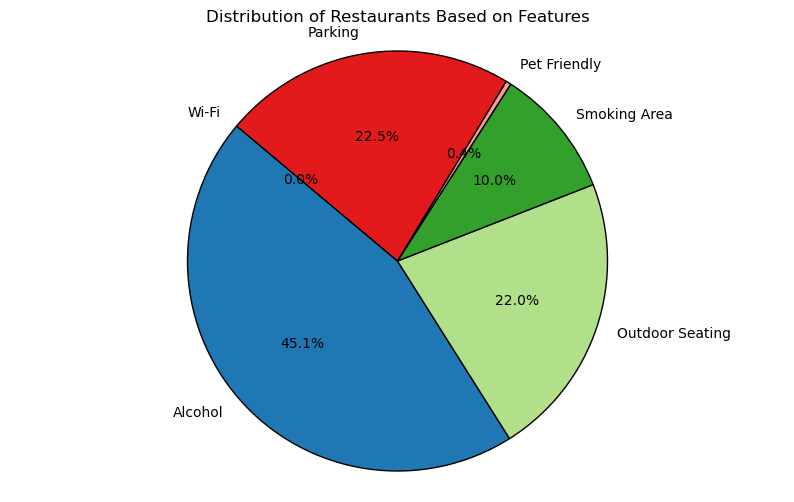

In [156]:

feature_counts = df1[features].sum()

plt.figure(figsize=(10, 6))
plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', 
        colors=plt.cm.Paired.colors, startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title('Distribution of Restaurants Based on Features')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()


## Observations & Recommendations  

### Observations  
- **Most Common Feature:** **Alcohol** is the most common feature among restaurants.  
- **Least Common Features:** **Pet-Friendly** and **Smoking Area** are the least common features.  

### Recommendations  
1. **Highlight Popular Features:** Promote restaurants that offer **Wi-Fi** and **alcohol availability** to attract more customers.  
2. **Target Specific Segments:** Cater to niche customer groups by highlighting restaurants with **pet-friendly spaces** or **outdoor seating**.  
3. **Partner with Venues:** Collaborate with venues that provide unique features like **smoking areas** or **dedicated parking** to expand customer reach.  


# Correlation Between Features and Ratings :

                  Wi-Fi   Alcohol  Outdoor Seating  Smoking Area  \
Wi-Fi               NaN       NaN              NaN           NaN   
Alcohol             NaN  1.000000         0.055327      0.096192   
Outdoor Seating     NaN  0.055327         1.000000      0.253829   
Smoking Area        NaN  0.096192         0.253829      1.000000   
Pet Friendly        NaN  0.015834         0.084368      0.094067   
Parking             NaN  0.149183         0.110840      0.244973   
aggregate_rating    NaN  0.163742         0.086409      0.135202   

                  Pet Friendly   Parking  aggregate_rating  
Wi-Fi                      NaN       NaN               NaN  
Alcohol               0.015834  0.149183          0.163742  
Outdoor Seating       0.084368  0.110840          0.086409  
Smoking Area          0.094067  0.244973          0.135202  
Pet Friendly          1.000000  0.042639          0.039264  
Parking               0.042639  1.000000          0.179302  
aggregate_rating      0.0392

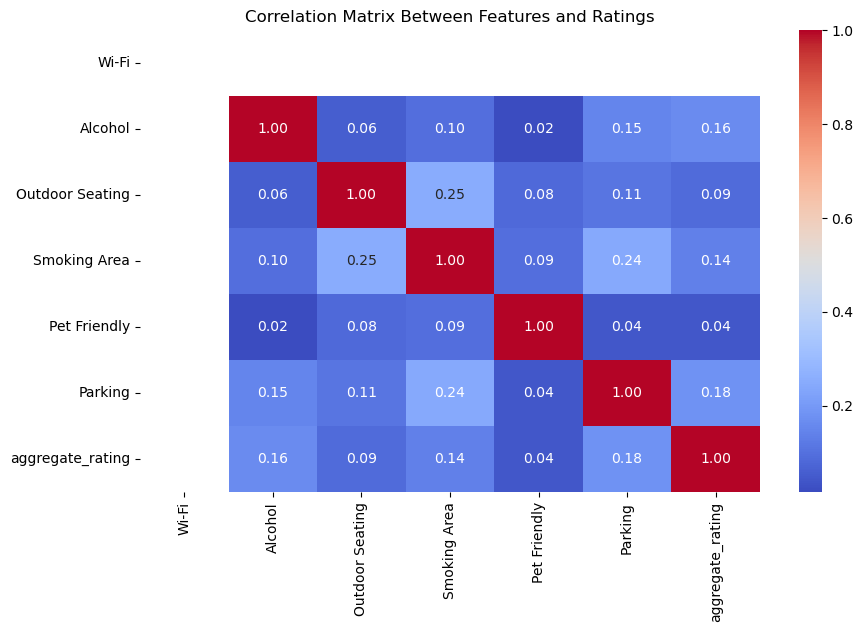

In [196]:

correlation_data = df1[features + ['aggregate_rating']]
correlation_matrix = correlation_data.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Between Features and Ratings')
plt.show()


## **Observations**
1. **Weak Correlation Between Features and Ratings**  
   - The correlation between restaurant features (Wi-Fi, Alcohol, Parking, etc.) and aggregate ratings is generally weak, with values mostly below 0.2.  

2. **Parking Shows the Highest Correlation with Ratings (0.18)**  
   - Restaurants with parking facilities tend to have slightly higher ratings, suggesting that accessibility is an important factor for customers.  

3. **Alcohol Service Has a Slight Positive Impact on Ratings (0.16)**  
   - Restaurants serving alcohol show a small positive correlation with higher ratings, indicating that it may contribute to a better dining experience.  

4. **Smoking Area and Outdoor Seating Have Minimal Impact**  
   - Both features show low correlation with ratings, implying they are not significant determinants of customer satisfaction.  

5. **Pet-Friendly Restaurants Have the Lowest Correlation with Ratings (0.04)**  
   - Pet-friendly policies do not significantly affect ratings, possibly because they cater to a niche audience.  

## **Recommendations**
1. **Enhance Parking Facilities**  
   - Since parking availability has the highest correlation with ratings, restaurants should invest in improving or ensuring parking access for customers.  

2. **Consider Alcohol Service Where Possible**  
   - Restaurants that are legally allowed to serve alcohol may benefit from adding it to their offerings, as it slightly contributes to higher ratings.  

3. **Focus on Other Service Improvements**  
   - Since features like Wi-Fi, smoking areas, and pet-friendly policies have minimal impact on ratings, restaurants should focus on food quality, service, and ambiance for better customer satisfaction.  

4. **Re-Evaluate the Importance of Outdoor and Smoking Areas**  
   - These features have low correlation with ratings, so restaurants should assess their target audience before prioritizing investments in them.  


# Distribution of Restaurants Based on Features :

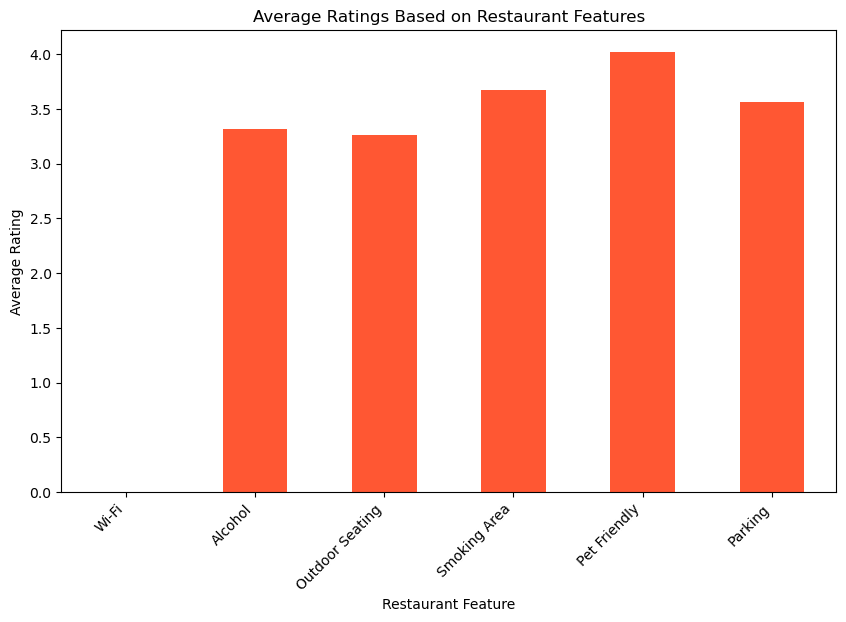

In [167]:

feature_ratings = {}
for feature in features:
    avg_rating = df1[df1[feature] == 1]['aggregate_rating'].mean()
    feature_ratings[feature] = avg_rating

feature_ratings_series = pd.Series(feature_ratings)

plt.figure(figsize=(10, 6))
feature_ratings_series.plot(kind='bar', color='#FF5733')  # Changed color to orange
plt.title('Average Ratings Based on Restaurant Features')
plt.xlabel('Restaurant Feature')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


# Number of restaurants by establishment type

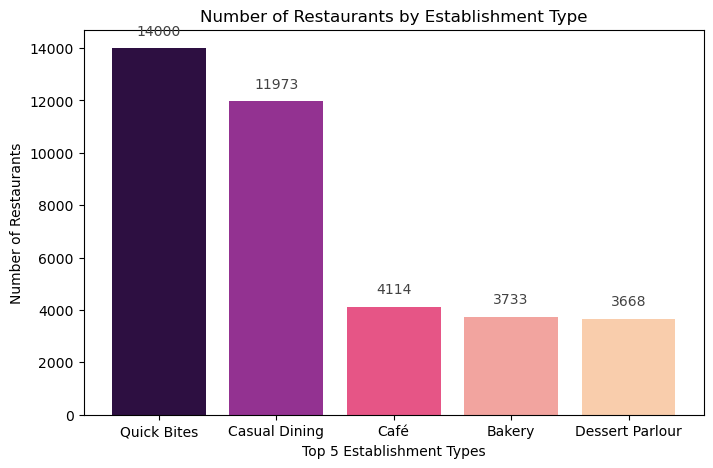

In [229]:

est_count = df1.groupby("establishment")["res_id"].count().sort_values(ascending=False).head(5)

colors = ["#2d0f41", "#933291", "#e65586", "#f2a49f", "#f9cdac"]

plt.figure(figsize=(8, 5))
plt.bar(est_count.index, est_count.values, color=colors)

plt.xlabel("Top 5 Establishment Types")
plt.ylabel("Number of Restaurants")
plt.title("Number of Restaurants by Establishment Type")

for i, v in enumerate(est_count):
    plt.text(i, v + 500, str(v), ha="center", color="#424242")

plt.show()




## **Observations**
1. **"Quick Bites" is the Most Common Establishment Type**  
   - It has the highest number of restaurants (14,000), suggesting that fast-service eateries dominate the market.  

2. **Casual Dining is the Second Most Popular Choice**  
   - With approximately 11,973 restaurants, casual dining remains a strong contender, indicating that customers still prefer sit-down meals.  

3. **Cafés, Bakeries, and Dessert Parlours Have a Smaller Presence**  
   - Cafés (4,114), Bakeries (3,733), and Dessert Parlours (3,668) have significantly fewer outlets, suggesting they cater to niche audiences.  

4. **Sharp Drop in Establishments Beyond Quick Bites & Casual Dining**  
   - There is a steep decline in numbers after the top two categories, highlighting a possible market saturation in fast food and sit-down dining.  

## **Recommendations**
1. **Invest in "Quick Bites" for High Demand**  
   - If opening a new restaurant, consider a fast-service model as it dominates the market.  

2. **Casual Dining as a Premium Option**  
   - While not as numerous as Quick Bites, Casual Dining is still a strong segment and could be profitable with unique offerings.  

3. **Opportunities in Cafés and Dessert Parlours**  
   - The lower numbers indicate potential for new players, particularly in underserved areas or with innovative concepts.  

4. **Market Research Before Opening a New Establishment**  
   - Since the restaurant industry is highly competitive, conducting a location-based analysis can help determine the best establishment type for success.  


# Restaurants Based On Highlights

In [250]:
df1["highlights"][0]

"['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"

In [256]:
hl = []
df1["highlights"].apply(lambda x : hl.extend(x[2:-2].split("', '")))
hl = pd.Series(hl)
print("Total number of unique highlights = ", hl.nunique())

Total number of unique highlights =  104


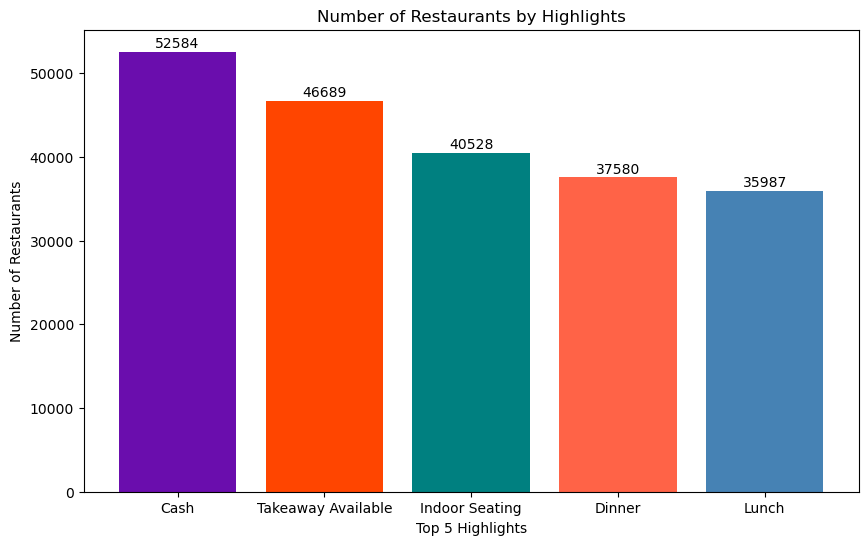

In [262]:

h_count = hl.value_counts().head(5)

plt.figure(figsize=(10, 6))

colors = ['#6a0dad', '#ff4500', '#008080', '#ff6347', '#4682b4']

plt.bar(h_count.index, h_count.values, color=colors)

plt.xlabel("Top 5 Highlights")
plt.ylabel("Number of Restaurants")
plt.title("Number of Restaurants by Highlights")

for i, v in enumerate(h_count):
    plt.text(i, v + 500, str(v), ha='center', color='black')

plt.show()




## **Observations**
1. **Cash Payment is the Most Common Highlight**  
   - The majority of restaurants accept cash, making it the most common highlight.  

2. **Takeaway is Highly Available**  
   - A significant number of restaurants provide takeaway services, indicating a strong preference for convenience.  

3. **Indoor Seating is a Popular Feature**  
   - Many restaurants offer indoor seating, suggesting that dine-in experiences are widely available.  

4. **Dinner is More Popular than Lunch**  
   - More restaurants are open for dinner compared to lunch, indicating a higher focus on evening dining.  

## **Recommendations**
1. **Leverage Cash Acceptance**  
   - Since cash is widely accepted, ensure smooth payment processes and possibly introduce digital payment options to cater to changing trends.  

2. **Enhance Takeaway Services**  
   - Restaurants should focus on optimizing takeaway services, such as packaging and delivery speed, to attract more customers.  

3. **Improve Indoor Dining Experience**  
   - Investing in better ambiance, comfort, and hygiene in indoor seating areas can enhance customer satisfaction.  

4. **Expand Lunch Offerings**  
   - Restaurants can introduce lunch promotions or business lunch specials to attract more midday customers.  


 # Word Cloud for Reviews

## First Let's see how the ratings are distributes :

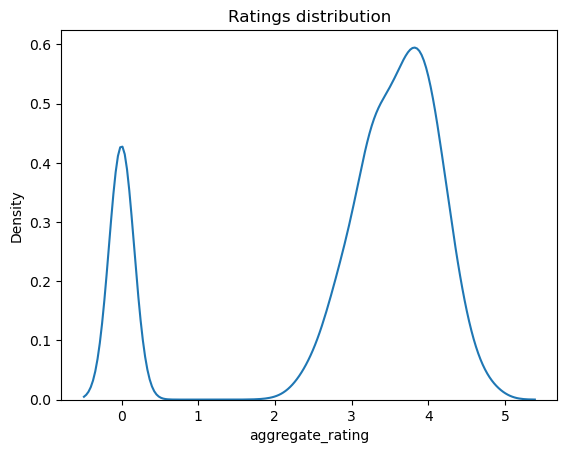

In [272]:
sns.kdeplot(df1['aggregate_rating'])
plt.title("Ratings distribution")
plt.show()



## **Observations**
1. **Bimodal Distribution of Restaurant Ratings**  
   - The ratings show two peaks, one around **0.5** and another around **4**.  
   - This suggests that a significant number of restaurants either have **very low ratings** or **very high ratings**, with fewer in the middle range.  

## **Recommendations**
1. **Focus on High-Rated Restaurants**  
   - Prioritize marketing and promotions for restaurants with **ratings of 4 and above** to attract more customers.  
   - Highlight positive reviews and customer testimonials in promotional campaigns.  

2. **Address Low-Rated Restaurants**  
   - Investigate the factors contributing to **low ratings (1.5 range)** and implement necessary improvements.  
   - Enhance service quality, improve food standards, and refine the overall customer experience.  

3. **Customer Feedback Analysis**  
   - Regularly analyze customer **reviews and feedback** to identify common complaints and trends.  
   - Implement corrective measures based on data-driven insights to **increase customer satisfaction**.  


In [275]:
df1['rating_text'].value_counts()

rating_text
Average          16256
Good             16006
Very Good        10901
Not rated         9662
Excellent         1609
Poor               575
Sangat Baik          9
Çok iyi              8
Bom                  7
Muito Bom            5
İyi                  5
Baik                 5
Velmi dobré          5
Buono                4
Dobré                4
Promedio             4
Skvělá volba         4
Průměr               4
Excelente            3
Muy Bueno            3
Skvělé               3
Vynikajúce           2
Terbaik              2
Veľmi dobré          2
Bardzo dobrze        2
Muito bom            1
Ortalama             1
Scarso               1
Bueno                1
Harika               1
Eccellente           1
Média                1
Dobrze               1
Name: count, dtype: int64

## Replace specific rating texts

In [278]:
df1['rating_text']=df1['rating_text'].replace({'Çok iyi' : 'Good', 'Sangat Baik' : 'Average', 'Muito Bom' : 'Very Good',
                                             'Excelente' : 'Excellent', 'Muy Bueno' : 'Excellent' ,'Excelente' : 'Excellent', 'Muy Bueno' : 'Poor',
                                             'Bardzo dobrze' : 'Good', 'Bom' : 'Average' , 'Baik': 'Excellent', 'Skvělé' : 'Not rated','Velmi dobré' : 'Not rated',
                                             'Buono' : 'Excellent', 'Dobrze' : 'Poor', 'Wybitnie' : 'Not rated', 'Eccellente' : 'Very Good' , 'Vynikajúce' : 'Average',
                                             'Průměr' : 'Poor', 'Média' : 'Good','Promedio':'Not rated','Muito bom' : 'Excellent','Ortalama': 'Poor', 'Średnio' : 'Good',
                                             'Priemer' : 'Good','Media' : 'Average','Biasa' : 'Excellent','Scarso': 'Poor','İyi' : 'Excellent', 'Harika' : 'Very Good',
                                             'Ottimo' : 'Average','Veľmi dobré': 'Excellent','Terbaik' : 'Excellent', 'Skvělá volba' : 'Good', 'Dobré' : 'Very Good',
                                             'Bueno' : 'Good'})
df1['rating_text'].value_counts()

rating_text
Average      16274
Good         16022
Very Good    10912
Not rated     9674
Excellent     1631
Poor           585
Name: count, dtype: int64

## First install Wordcloud

In [ ]:
pip install wordcloud


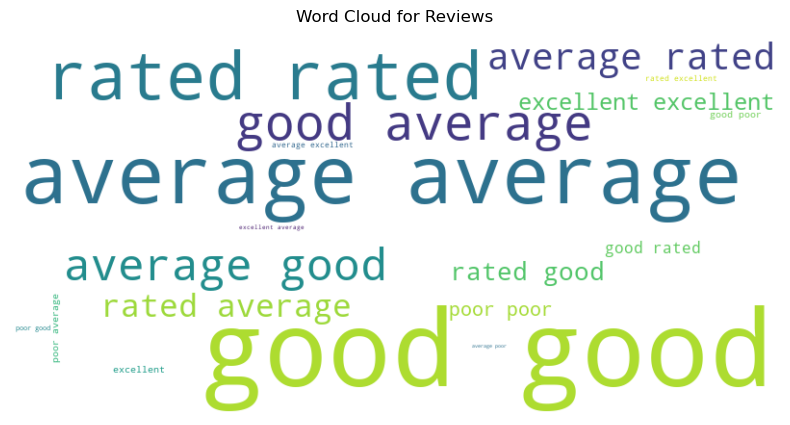

In [294]:
import string 
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = df1['rating_text']

def clean_text(text):
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

cleaned_reviews = reviews.apply(clean_text)

all_reviews = ' '.join(cleaned_reviews)

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()

# Plotting rating text

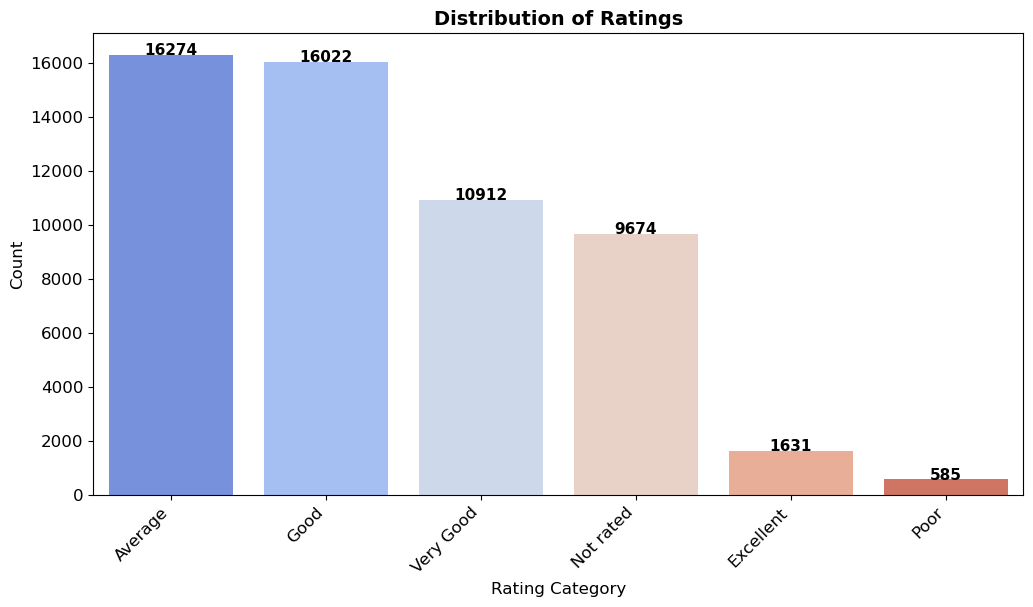

In [298]:

high = df1['rating_text'].value_counts()
colors = sns.color_palette("coolwarm", len(high))

plt.figure(figsize=(12, 6))
g = sns.barplot(x=high.index, y=high.values, palette=colors)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of Ratings", fontsize=14, fontweight='bold')
plt.xlabel("Rating Category", fontsize=12)
plt.ylabel("Count", fontsize=12)

for index, value in enumerate(high.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=11, fontweight='bold')

plt.show()


## Observations:
- The majority of customers have rated the restaurants as **"Good"** or **"Average"**.
- A significant proportion of customers have not rated the restaurants.

## Recommendations:
### Encourage Customer Feedback
- Implement strategies to encourage more customers to leave ratings and reviews.
- Offer incentives such as discounts or loyalty points.
- Make the rating process simpler and more accessible.

### Focus on Improving "Good" Ratings
- Identify areas where **"Good"** rated restaurants can improve to reach **"Very Good"** or **"Excellent"** ratings.
- Enhance **food quality, service, and ambiance** to boost customer satisfaction.

### Address "Poor" Ratings
- Analyze the reasons for **poor ratings** and identify common complaints.
- Take corrective actions such as **improving service, addressing hygiene concerns, and training staff**.
- Implement a structured approach to prevent negative reviews in the future.


# **Conclusions**

After analyzing the data, we can conclude the following:

### **1. Restaurant Chains in India**
- Approximately **35% of restaurants** in India are part of **some chain**.
- **Domino’s Pizza, Café Coffee Day, and KFC** are the largest **fast-food chains** with the most outlets.
- **Barbecues and Grill** food chains have the **highest average ratings** compared to other restaurant types.

### **2. Popular Restaurant Types**
- **Quick Bites** and **Casual Dining** establishments have the **most outlets**.
- **Restaurants that serve alcohol** tend to have the **highest average ratings, votes, and photo uploads**.

### **3. City-Wise Insights**
- **Bangalore** has the **most number of restaurants**.
- **Gurgaon** has the **highest-rated restaurants** (average rating of **3.83**).
- **Hyderabad** has the most **critics** (highest number of votes).
- **Mumbai** and **New Delhi** dominate in terms of **most photo uploads per outlet**.

### **4. Cuisine Preferences**
- After **North Indian**, **Chinese** is the **most preferred cuisine** in India.
- **International cuisines** generally receive **higher ratings** than local cuisines.
- **Gastro pubs, Romantic Dining, and Craft Beer** features are **highly rated by customers**.

### **5. Pricing and Rating Patterns**
- Most restaurants have ratings **between 3 and 4**.
- The majority of restaurants are **budget-friendly**, with an **average cost for two ranging between ₹250 to ₹800**.
- There are **fewer restaurants** in **higher price ranges**.
- As the **average cost for two increases**, the **likelihood of a restaurant having a higher rating also increases**.




# **Business Implications**

### **For Restaurant Owners:**
- **Table Booking & Convenience:** Offering **table booking** can attract more customers who prefer pre-planned dining experiences.
- **Competitive Pricing Strategies:** Adjusting **pricing based on location and competition** can help reach a broader customer base.
- **Quality Enhancement:** Maintaining **high service quality, food consistency, and ambiance** can lead to **better ratings and reviews**.

### **For Zomato:**
- **Strategic Partnerships:** Collaborating with **high-demand restaurants** can improve customer satisfaction and boost platform engagement.
- **Customer Feedback Mechanisms:** Encouraging customers to leave **ratings and reviews** can enhance trust and credibility.
- **AI-Powered Recommendations:** Implementing **predictive analytics and customer segmentation** can improve personalized recommendations for users.

### **Future Scope:**
This analysis lays the foundation for deeper studies such as:
- **Customer Segmentation:** Identifying different diner personas based on preferences and spending behavior.
- **Predictive Modeling:** Forecasting restaurant success based on factors like **ratings, location, and cuisine type**.
- **Demand Analysis:** Understanding **seasonal trends and peak dining times** to optimize restaurant operations.

By leveraging these insights, both **restaurant owners and Zomato** can enhance customer satisfaction, increase engagement, and drive growth in the restaurant industry.
